In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [2]:
data = fetch_california_housing(as_frame=True)
df = data.frame

X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((16512, 8), (4128, 8))

In [4]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

In [6]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

rmse_lr, mae_lr, r2_lr

(np.float64(0.7455813830127764), 0.533200130495656, 0.5757877060324508)

In [7]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

In [8]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

rmse_rf, mae_rf, r2_rf

(np.float64(0.5039602414072009), 0.3268118504360468, 0.8061857564039718)

In [9]:
import pandas as pd

results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "RMSE": [rmse_lr, rmse_rf],
    "MAE": [mae_lr, mae_rf],
    "R2": [r2_lr, r2_rf]
})

results


,Model,RMSE,MAE,R2
0,Linear Regression,0.745581,0.533200,0.575788
1,Random Forest,0.503960,0.326812,0.806186


从结果对比可以看出，随机森林模型在 RMSE 和 MAE 指标上优于线性回归，同时 R² 更高，说明其能够捕捉特征与房价之间更复杂的非线性关系，因此后续分析主要基于随机森林模型展开。

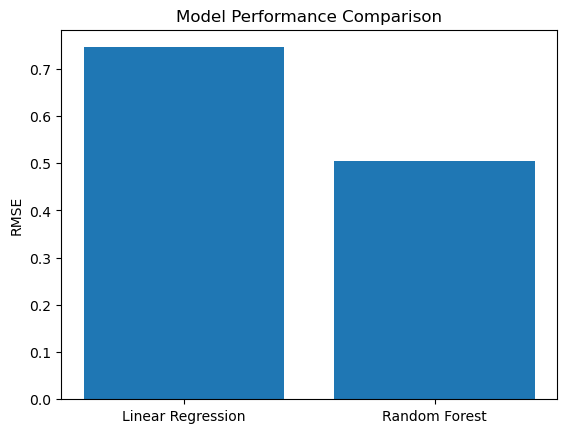

In [3]:
import matplotlib.pyplot as plt

models = ["Linear Regression", "Random Forest"]
rmse_values = [0.745581, 0.503960]

plt.bar(models, rmse_values)
plt.ylabel("RMSE")
plt.title("Model Performance Comparison")
plt.show()